In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm 
import seaborn as sns
import datetime
import time

from importlib import reload
import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

In [2]:
import strategies

In [3]:
reload(strategies)

<module 'strategies' from 'C:\\Users\\Sharp.Ra\\PyProjects\\FinalMDS\\strategies.py'>

## Load data

In [4]:
market_orders = pd.read_feather('market_orders_USDRUB.feather')

## Run 1 period simulation

### Eq-strategy

In [6]:
start_date = datetime.datetime(2021, 7, 1, 11, 0, 0)
end_date = datetime.datetime(2021, 7, 1, 12, 0, 0)

In [7]:
stq = strategies.EquiDistantStrategy(0.0025)

In [8]:
df = market_orders[(market_orders['Time'] >= start_date) &
                   (market_orders['Time'] <= end_date)]

In [9]:
df[:5]

,Time,AGGRESSOR_SIDE,PRICE_min,PRICE_max,SIZE_sum,Date,TimeOnly,DOW,H,Impact,BID,ASK,MID,Spread
3350279,2021-07-01 11:00:00.452411,B,72.8350,72.8375,168,2021-07-01,11:00:00.452411,4,11,0.0025,72.827499,72.834999,72.831253,0.0075
3350280,2021-07-01 11:00:01.157414,B,72.8375,72.8375,10,2021-07-01,11:00:01.157414,4,11,0.0000,72.830002,72.837502,72.833755,0.0075
3350281,2021-07-01 11:00:03.460194,S,72.8300,72.8300,50,2021-07-01,11:00:03.460194,4,11,0.0000,72.827499,72.837502,72.832504,0.0100
3350282,2021-07-01 11:00:04.191317,S,72.8250,72.8250,102,2021-07-01,11:00:04.191317,4,11,0.0000,72.824997,72.834999,72.830002,0.0100
3350283,2021-07-01 11:00:04.210206,S,72.8250,72.8250,298,2021-07-01,11:00:04.210206,4,11,0.0000,72.824997,72.834999,72.830002,0.0100


In [11]:
df_deals = stq.run_period_sim(df, 2)

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1


In [12]:
df_deals[:5]

,Time,Wealth,Inventory,Side,Mid,Bid,Ask,R-price,Spread,PnL
0,2021-07-01 11:00:00.452411,72.837499,-1.0,-1.0,72.831249,72.824999,72.837499,72.831249,0.0125,0.006250
1,2021-07-01 11:00:01.157414,72.837499,-1.0,0.0,72.833752,72.827502,72.840002,72.833752,0.0125,0.003748
2,2021-07-01 11:00:03.460194,0.009999,0.0,1.0,72.832500,72.827500,72.837500,72.832500,0.0100,0.009999
3,2021-07-01 11:00:04.191317,-72.814999,1.0,1.0,72.829998,72.824998,72.834998,72.829998,0.0100,0.014999
4,2021-07-01 11:00:04.210206,-145.639997,2.0,1.0,72.829998,72.824998,72.834998,72.829998,0.0100,0.019999


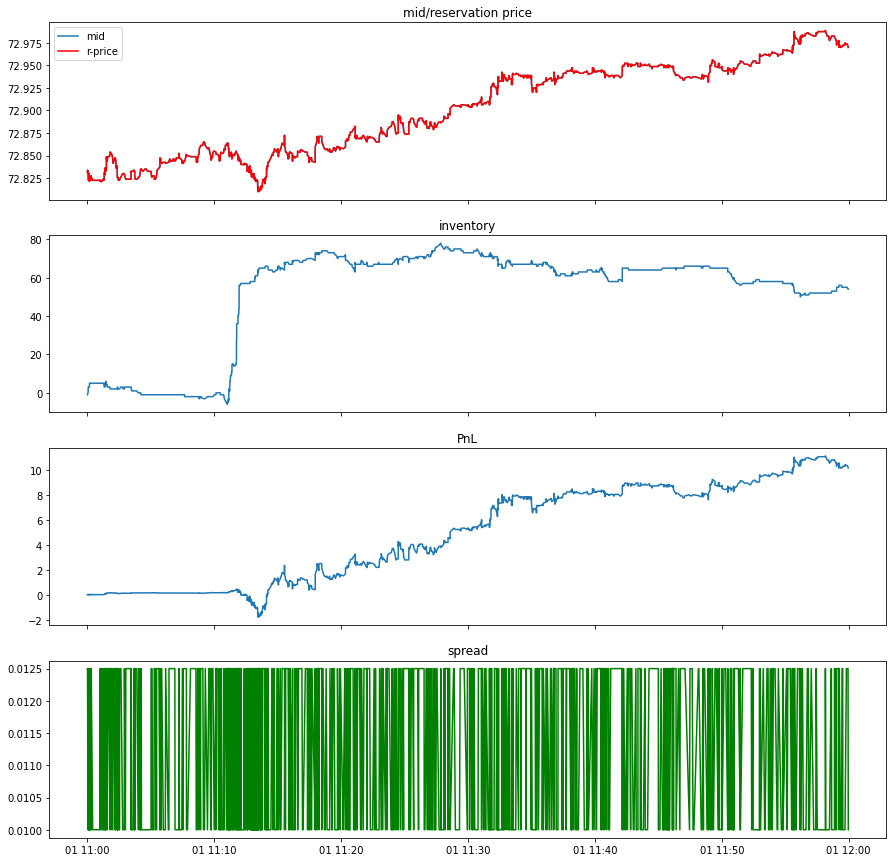

In [15]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

In [16]:
df_deals[df_deals['Side']!=0].shape

(376, 10)

### AS-model

In [17]:
sta = strategies.ASModel1Strategy(ticksize=0.0025, gamma=0.1, k=300, sigma=0.14)

In [18]:
df_deals = sta.run_period_sim(df, W=0, Q=0, min_spread=2, max_distance=5)

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1


In [19]:
df_deals.shape

(2880, 10)

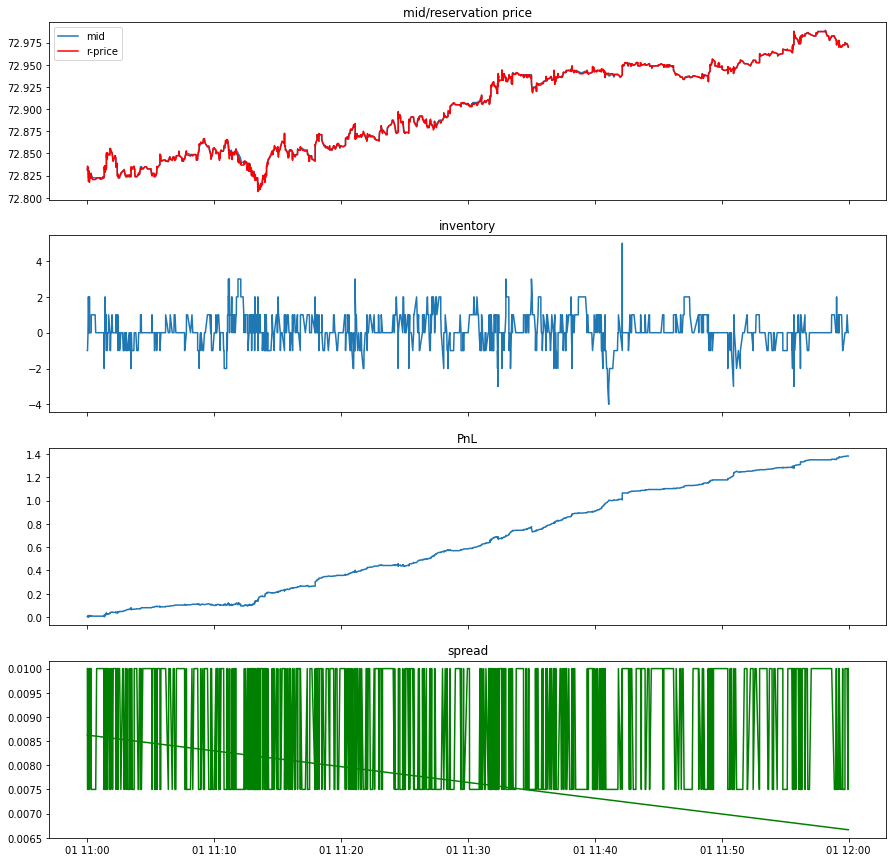

In [20]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [21]:
df_deals[df_deals['Side']!=0].shape

(716, 10)

### Compare Eq and AS strategies

In [17]:
def sampler_realdata(market_orders, n, time_horizon):
    """
    """
    session_start = 10
    session_end = 17
    df = market_orders[(market_orders['H']>=session_start) & (market_orders['H']<=session_end)]
    dates = np.random.choice(df['Date'].unique(), n)
    hours = np.random.choice(range(session_start, session_end-time_horizon), n)
    
    for date, hour in zip(dates, hours):
        yield df[(df['H']==hour) & (df['Date']==date)]

In [65]:
def add_sim(df_simres, df_deals_A, df_deals_B):
    """
    Auxilary function
    """
    # Statistics: PL, MinPL, Q, MaxQ,
    last_deal_A = df_deals_A.iloc[-1]
    last_deal_B = df_deals_B.iloc[-1]
    
    row = {}
    row['A_PL'] = last_deal_A['PnL']
    row['A_MinPL'] = df_deals_A['PnL'].min()
    row['A_Q'] = last_deal_A['Inventory']
    row['A_MaxQ'] = df_deals_A['Inventory'].abs().max()
    row['A_N'] = df_deals_A.shape[0]
    row['A_avPL'] = last_deal_A['PnL'] / last_deal_A['PnL']
    
    row['B_PL'] = last_deal_B['PnL']
    row['B_MinPL'] = df_deals_B['PnL'].min()
    row['B_Q'] = last_deal_B['Inventory']
    row['B_MaxQ'] = df_deals_B['Inventory'].abs().max()
    row['B_N'] = df_deals_B.shape[0]
    row['B_avPL'] = last_deal_B['PnL'] / last_deal_B['PnL']

    return df_simres.append(pd.DataFrame(row, index=[0]), ignore_index=True)

In [19]:
columns = ['A_PL', 'A_MinPL', 'A_Q', 'A_MaxQ', 'B_PL', 'B_MinPL', 'B_Q', 'B_MaxQ']
df_simres = pd.DataFrame(columns=columns)

for df in tqdm(sampler_realdata(market_orders, 500, 1), total=500):
    if df.shape[0] == 0:
        continue

#     print(df['Time'].iloc[0], df['Time'].iloc[-1], df.shape)
    df_deals_EQ = stq.run_period_sim(df, 2)
    df_deals_AS = sta.run_period_sim(df, 0, 0, min_spread=2, max_distance=5)
    df_simres = add_sim(df_simres, df_deals_AS, df_deals_EQ)


  0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [20]:
df_simres[:5]

,A_PL,A_MinPL,A_Q,A_MaxQ,B_PL,B_MinPL,B_Q,B_MaxQ
0,2.010005,0.005001,2.0,12.0,2.328623,-5.120070,-47.0,99.0
1,2.287499,0.000000,3.0,6.0,3.937520,-2.524980,-24.0,37.0
2,3.763758,-0.636247,5.0,13.0,-28.559539,-46.861932,-453.0,472.0
3,0.977505,0.000000,2.0,4.0,0.439874,-0.134997,-38.0,45.0
4,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0


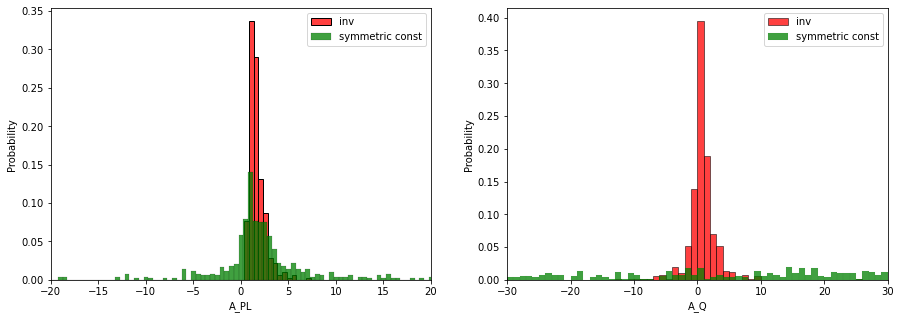

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_PL', color='r', ax=axes[0], label='inv', binwidth=0.5, stat='probability')
sns.histplot(data=df_simres, x='B_PL', color='g', ax=axes[0], label='symmetric const', binwidth=0.5, stat='probability')
axes[0].set_xlim([-20, 20])
axes[0].legend()

sns.histplot(data=df_simres, x='A_Q', color='r', ax=axes[1], label='inv', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_Q', color='g', ax=axes[1], label='symmetric const', binwidth=1, stat='probability')
axes[1].set_xlim([-30, 30])
axes[1].legend()

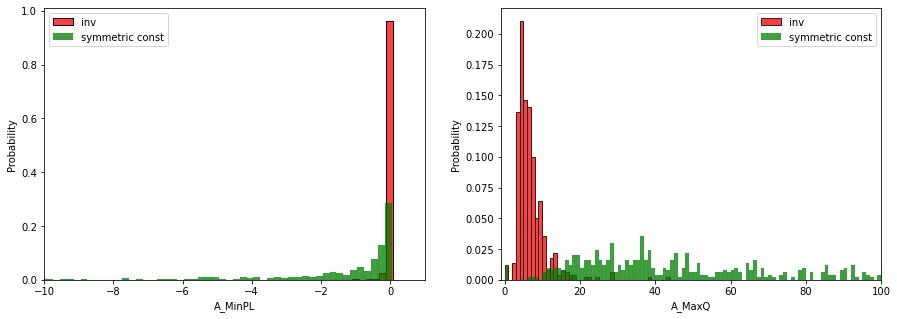

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_MinPL', color='r', ax=axes[0], label='inv', binwidth=0.2, stat='probability')
sns.histplot(data=df_simres, x='B_MinPL', color='g', ax=axes[0], label='symmetric const', binwidth=0.2, stat='probability')
axes[0].set_xlim([-10, 1])
axes[0].legend()

sns.histplot(data=df_simres, x='A_MaxQ', color='r', ax=axes[1], label='inv', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_MaxQ', color='g', ax=axes[1], label='symmetric const', binwidth=1, stat='probability')
axes[1].set_xlim([-1, 100])
axes[1].legend()

## Generated data

In [31]:
import generator
reload(generator)

<module 'generator' from 'C:\\Users\\Sharp.Ra\\PyProjects\\FinalMDS\\generator.py'>

In [32]:
start_date = datetime.datetime(2021, 1, 1, 11, 0, 0)
end_date = datetime.datetime(2021, 1, 1, 13, 0, 0)

In [33]:
# LOAD spreads
spreads = np.load('spreads.npz')['arr_0']
spreads

array([0.16907321, 0.31100837, 0.35036459, 0.13398757, 0.02894879,
       0.00661747])

In [34]:
gen = generator.Market(0, 0.14, 0.0025, spreads)

In [35]:
# LOAD PMF for x50 volumes
gen.init_x0_model('PMFx50.npz')

In [36]:
# Load KDE model for xx volumes
gen.init_xx_model('kde_model.pickle')

In [37]:
dfg = gen.order_book(2200, 75., start_date, end_date, 0.5, 0.36)
dfg.shape

(4347, 6)

In [43]:
dfg[:5]

,Time,Side,Volume,Impact,BID,ASK
0,2021-01-01 11:00:09.612538,-1,8.0,0.0,75.0075,75.0125
1,2021-01-01 11:00:09.819086,-1,100.0,0.0,75.0075,75.0150
2,2021-01-01 11:00:10.502661,-1,150.0,0.0,75.0075,75.0150
3,2021-01-01 11:00:11.622562,-1,100.0,0.0,75.0125,75.0200
4,2021-01-01 11:00:12.897336,1,50.0,0.0,75.0100,75.0175


### AS-model on generated data

In [40]:
df_deals = sta.run_period_sim(dfg, W=0, Q=0, min_spread=2, max_distance=5, preprocess=False)

In [42]:
df_deals[:5]

,Time,Wealth,Inventory,Side,Mid,Bid,Ask,R-price,Spread,PnL
0,2021-01-01 11:00:09.612538,0.0,0.0,0.0,75.01000,75.005,75.015,75.01000,0.010579,0.0
1,2021-01-01 11:00:09.819086,0.0,0.0,0.0,75.01125,75.005,75.015,75.01125,0.010579,0.0
2,2021-01-01 11:00:10.502661,0.0,0.0,0.0,75.01125,75.005,75.015,75.01125,0.010579,0.0
3,2021-01-01 11:00:11.622562,0.0,0.0,0.0,75.01625,75.010,75.020,75.01625,0.010578,0.0
4,2021-01-01 11:00:12.897336,0.0,0.0,0.0,75.01375,75.010,75.020,75.01375,0.010577,0.0


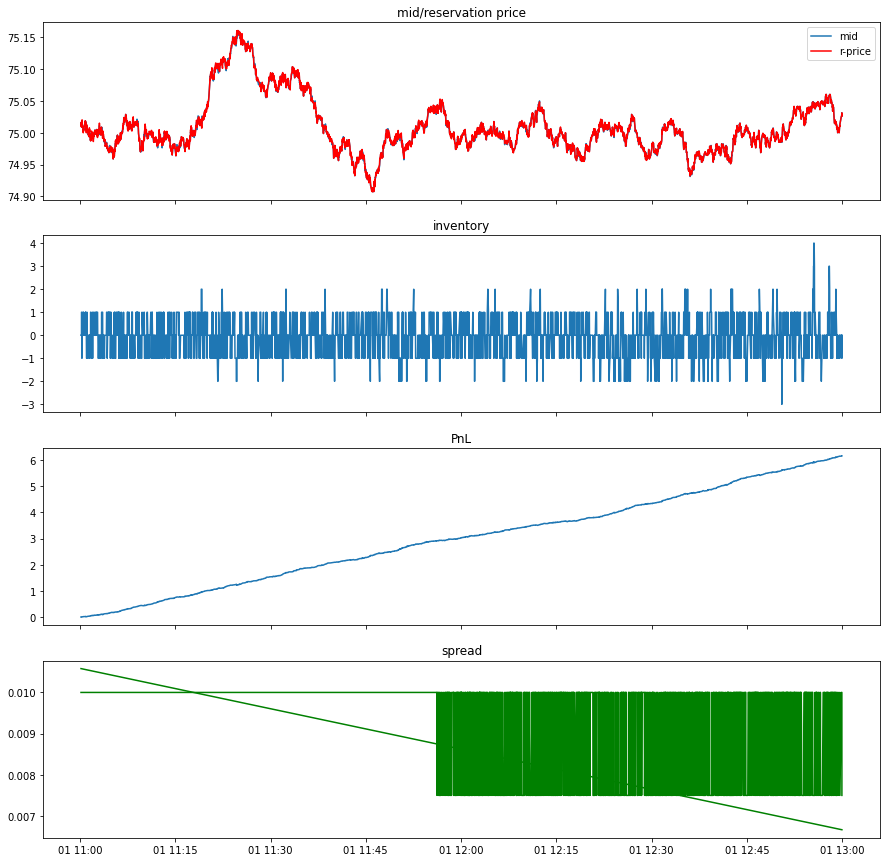

In [44]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [45]:
df_deals[df_deals['Side']!=0].shape

(2066, 10)

### Equidistant-base strategy

In [50]:
df_deals = stq.run_period_sim(dfg, 2, preprocess=False)

In [52]:
df_deals.shape

(4347, 10)

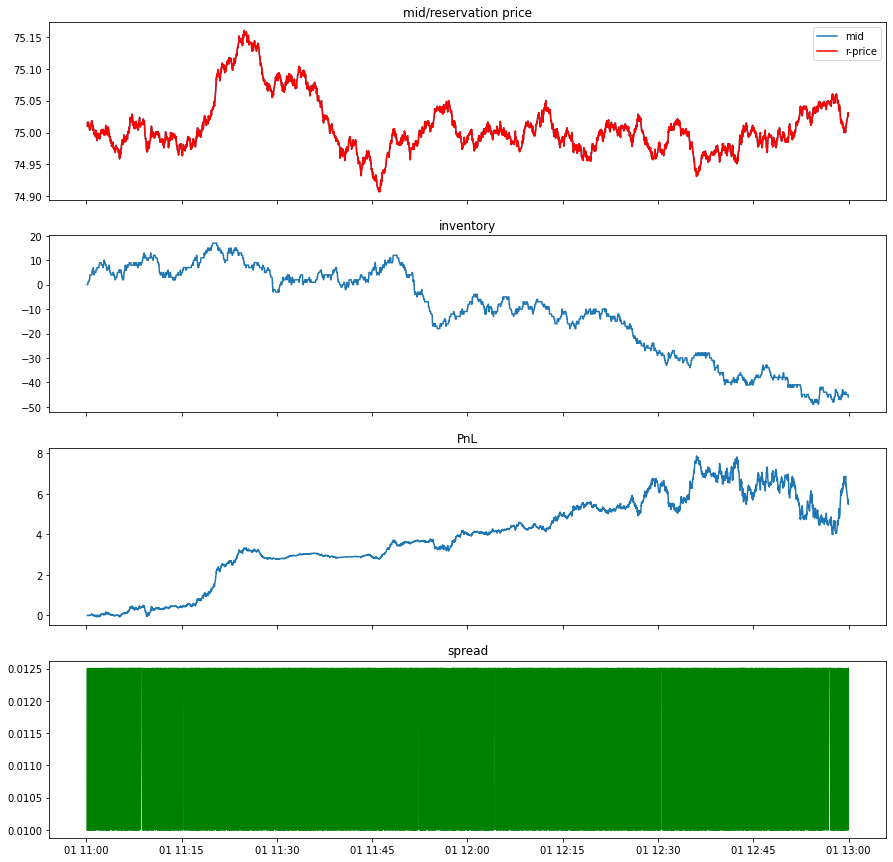

In [54]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [55]:
df_deals[df_deals['Side']!=0].shape

(996, 10)

### Compare strategies

In [60]:
columns = ['A_PL', 'A_MinPL', 'A_Q', 'A_MaxQ', 'B_PL', 'B_MinPL', 'B_Q', 'B_MaxQ']
df_simres = pd.DataFrame(columns=columns)

for _ in tqdm(range(500)):
    dfg = gen.order_book(2200, 75., start_date, end_date, 0.5, 0.36)

#     print(df['Time'].iloc[0], df['Time'].iloc[-1], df.shape)
    df_deals_EQ = stq.run_period_sim(dfg, 2, preprocess=False)
    df_deals_AS = sta.run_period_sim(dfg, 0, 0, min_spread=2, max_distance=5, preprocess=False)
    df_simres = add_sim(df_simres, df_deals_AS, df_deals_EQ)

  0%|          | 0/500 [00:00<?, ?it/s]

In [61]:
df_simres[:5]

,A_PL,A_MinPL,A_Q,A_MaxQ,B_PL,B_MinPL,B_Q,B_MaxQ
0,6.60875,0.00000,1.0,4.0,2.76875,-0.00375,-17.0,21.0
1,5.91625,0.00500,-3.0,3.0,4.13375,-2.97375,-39.0,47.0
2,6.99750,0.00000,0.0,5.0,6.93000,0.00000,6.0,11.0
3,6.50750,0.00000,0.0,4.0,5.99500,0.00000,2.0,15.0
4,6.41000,0.00375,1.0,4.0,5.84500,-0.82250,-16.0,34.0


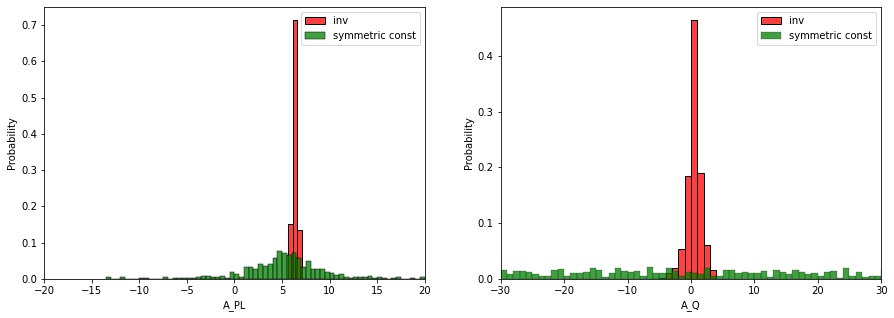

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_PL', color='r', ax=axes[0], label='inv', binwidth=0.5, stat='probability')
sns.histplot(data=df_simres, x='B_PL', color='g', ax=axes[0], label='symmetric const', binwidth=0.5, stat='probability')
axes[0].set_xlim([-20, 20])
axes[0].legend()

sns.histplot(data=df_simres, x='A_Q', color='r', ax=axes[1], label='inv', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_Q', color='g', ax=axes[1], label='symmetric const', binwidth=1, stat='probability')
axes[1].set_xlim([-30, 30])
axes[1].legend()

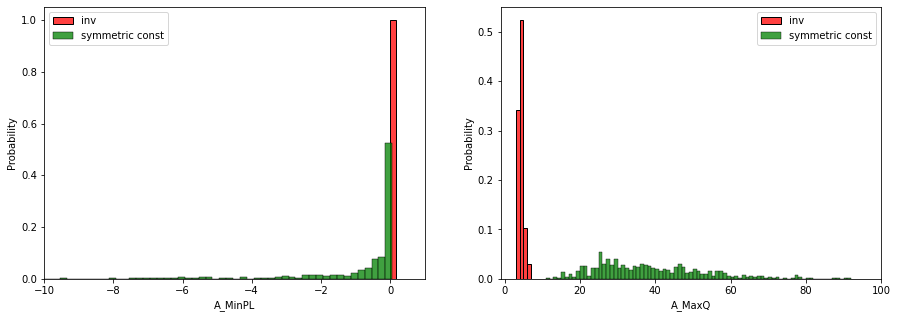

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_MinPL', color='r', ax=axes[0], label='inv', binwidth=0.2, stat='probability')
sns.histplot(data=df_simres, x='B_MinPL', color='g', ax=axes[0], label='symmetric const', binwidth=0.2, stat='probability')
axes[0].set_xlim([-10, 1])
axes[0].legend()

sns.histplot(data=df_simres, x='A_MaxQ', color='r', ax=axes[1], label='inv', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_MaxQ', color='g', ax=axes[1], label='symmetric const', binwidth=1, stat='probability')
axes[1].set_xlim([-1, 100])
axes[1].legend()

In [64]:
df_simres

,A_PL,A_MinPL,A_Q,A_MaxQ,B_PL,B_MinPL,B_Q,B_MaxQ
0,6.60875,0.00000,1.0,4.0,2.76875,-0.00375,-17.0,21.0
1,5.91625,0.00500,-3.0,3.0,4.13375,-2.97375,-39.0,47.0
2,6.99750,0.00000,0.0,5.0,6.93000,0.00000,6.0,11.0
3,6.50750,0.00000,0.0,4.0,5.99500,0.00000,2.0,15.0
4,6.41000,0.00375,1.0,4.0,5.84500,-0.82250,-16.0,34.0
...,...,...,...,...,...,...,...,...
495,6.51250,0.00000,0.0,4.0,3.10500,-0.73375,-18.0,23.0
496,6.50500,0.00000,1.0,3.0,6.30000,0.00000,6.0,27.0
497,6.35750,0.00000,-2.0,4.0,4.04000,-0.01375,2.0,30.0
498,6.47500,0.00375,0.0,4.0,4.68750,0.00000,5.0,25.0
